In [1]:
#final script

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

In [2]:
### Cleaning DataFrame
## Renaming Columns
# Dropping data not needed 

In [3]:
employment_data = pd.read_csv("./Data/Unemployment and Household Income 2007-08.csv")
employment_data = employment_data.iloc[7:,]
employment_data = employment_data.rename(columns={"Unemployment and median household income for the U.S., States, and counties, 2007-18":"Unemployment Rate","Unnamed: 1": "State", "Unnamed: 2": "County/State","Unnamed: 3":"Rural 2013","Unnamed: 4":"Urban 2013","Unnamed: 5":"Metro 2013","Unnamed: 6":"CLF 2007","Unnamed: 7":"Emp 2007","Unnamed: 8":"Unemp 2007","Unnamed: 9":"Unemp Rate 2007","Unnamed: 10":"CLF 2008","Unnamed: 11":"Emp 2008","Unnamed: 12":"Unemp 2008","Unnamed: 13":"Unemp Rate 2008","Unnamed: 14":"CLF 2009","Unnamed: 15":"Emp 2009","Unnamed: 16":"Unemp 2009","Unnamed: 17":"Unemp Rate 2009","Unnamed: 18":"CLF 2010","Unnamed: 19":"Emp 2010","Unnamed: 20":"Unemp 2010","Unnamed: 21":"Unemp Rate 2010","Unnamed: 22":"CLF 2011","Unnamed: 23":"Emp 2011","Unnamed: 24":"Unemp 2011","Unnamed: 25":"Unemp Rate 2011","Unnamed: 26":"CLF 2012","Unnamed: 27":"Emp 2012","Unnamed: 28":"Unemp 2012","Unnamed: 29":"Unemp Rate 2012","Unnamed: 30":"CLF 2013","Unnamed: 31":"Emp 2013","Unnamed: 32":"Unemp 2013","Unnamed: 33":"Unemp Rate 2013","Unnamed: 34":"CLF 2014","Unnamed: 35":"Emp 2014","Unnamed: 36":"Unemp 2014","Unnamed: 37":"Unemp Rate 2014","Unnamed: 38":"CLF 2015","Unnamed: 39":"Emp 2015","Unnamed: 40":"Unemp 2015","Unnamed: 41":"Unemp Rate 2015","Unnamed: 42":"CLF 2016","Unnamed: 43":"Emp 2016","Unnamed: 44":"Unemp 2016","Unnamed: 45":"Unemp Rate 2016","Unnamed: 46":"CLF 2017","Unnamed: 47":"Emp 2017","Unnamed: 48":"Unemp 2017","Unnamed: 49":"Unemp Rate 2017","Unnamed: 50":"CLF 2018","Unnamed: 51":"Emp 2018","Unnamed: 52":"Unemp 2018","Unnamed: 53":"Unemp Rate 2018", "Unnamed: 54": "Median Household Income 2017", "Unnamed: 55": "Median HH Income (%) 2017"})
employment_data = employment_data.drop(["Unemployment Rate","Rural 2013", "Urban 2013", "Metro 2013"], axis=1)
employment_data_only = employment_data.drop(["Median Household Income 2017", "Median HH Income (%) 2017"], axis=1)
employment_data = employment_data.set_index("State")
employment_data = employment_data.drop('PR')

employment_data_only = employment_data_only.set_index("State")
employment_data_only = employment_data_only.drop('PR')
employment_data_only = employment_data_only.fillna('-')
employment_data = employment_data.fillna('-')
employment_data_only.head()

County/State     CLF 2007     Emp 2007 Unemp 2007  \
State                                                            
US          United States  152,191,093  145,156,134  7,034,959   
AL                Alabama    2,175,612    2,089,127     86,485   
AL     Autauga County, AL       24,383       23,577        806   
AL     Baldwin County, AL       82,659       80,099      2,560   
AL     Barbour County, AL       10,334        9,684        650   

      Unemp Rate 2007   CLF 2008   Emp 2008 Unemp 2008 Unemp Rate 2008  \
State                                                                    
US                4.6  153761095  144860350    8900745             5.8   
AL                  4  2,176,489  2,053,477    123,012             5.7   
AL                3.3     24,687     23,420      1,267             5.1   
AL                3.1     83,223     79,372      3,851             4.6   
AL                6.3     10,161      9,267        894             8.8   

          CLF 2009  ... Unemp 2016 Unemp Rate 2016     CLF 2017     Emp 2017  \
State               ...                                                        
US     153,825,455  ...  7,727,644             4.9  160,273,906  153,293,830   
AL         2162999  ...    127,238             5.8      2178243      2081676   
AL           24703  ...      1,321             5.1        25972        24958   
AL           82451  ...      4,831             5.3        92090        88342   
AL           10003  ...        700             8.3         8317         7831   

      Unemp 2017 Unemp Rate 2017     CLF 2018     Emp 2018 Unemp 2018  \
State                                                                   
US     6,980,076             4.4  161,640,488  155,344,043  6,296,445   
AL         96567             4.4    2,198,837    2,112,347     86,490   
AL          1014             3.9       25,957       25,015        942   
AL          3748             4.1       93,849       90,456      3,393   
AL           486             5.8        8,373        7,940        433   

      Unemp Rate 2018  
State                  
US                3.9  
AL                3.9  
AL                3.6  
AL                3.6  
AL                5.2  

[5 rows x 49 columns]

In [4]:
## Changing data strings to floats

In [80]:
def parseFloat(data):
    parsedData = re.sub( '[^\d\.]', '', data)
    return (re.sub( '[^\d\.]', '', data)) if parsedData else 0
employment_d = employment_data_only.iloc[:,1:].applymap(parseFloat)
e = employment_d.astype('float')
e['State'] = employment_data_only['County/State']
e.head()

CLF 2007     Emp 2007  Unemp 2007  Unemp Rate 2007     CLF 2008  \
State                                                                       
US     152191093.0  145156134.0   7034959.0              4.6  153761095.0   
AL       2175612.0    2089127.0     86485.0              4.0    2176489.0   
AL         24383.0      23577.0       806.0              3.3      24687.0   
AL         82659.0      80099.0      2560.0              3.1      83223.0   
AL         10334.0       9684.0       650.0              6.3      10161.0   

          Emp 2008  Unemp 2008  Unemp Rate 2008     CLF 2009     Emp 2009  \
State                                                                       
US     144860350.0   8900745.0              5.8  153825455.0  139594698.0   
AL       2053477.0    123012.0              5.7    2162999.0    1924747.0   
AL         23420.0      1267.0              5.1      24703.0      22301.0   
AL         79372.0      3851.0              4.6      82451.0      74403.0   
AL          9267.0       894.0              8.8      10003.0       8572.0   

       ...  Unemp Rate 2016     CLF 2017     Emp 2017  Unemp 2017  \
State  ...                                                          
US     ...              4.9  160273906.0  153293830.0   6980076.0   
AL     ...              5.8    2178243.0    2081676.0     96567.0   
AL     ...              5.1      25972.0      24958.0      1014.0   
AL     ...              5.3      92090.0      88342.0      3748.0   
AL     ...              8.3       8317.0       7831.0       486.0   

       Unemp Rate 2017     CLF 2018     Emp 2018  Unemp 2018  Unemp Rate 2018  \
State                                                                           
US                 4.4  161640488.0  155344043.0   6296445.0              3.9   
AL                 4.4    2198837.0    2112347.0     86490.0              3.9   
AL                 3.9      25957.0      25015.0       942.0              3.6   
AL                 4.1      93849.0      90456.0      3393.0              3.6   
AL                 5.8       8373.0       7940.0       433.0              5.2   

                    State  
State                      
US          United States  
AL                Alabama  
AL     Autauga County, AL  
AL     Baldwin County, AL  
AL     Barbour County, AL  

[5 rows x 49 columns]

In [7]:
## Creating Lists to be iterated through for each state and each year involved in study

In [81]:
states = ["Alabama", 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas','Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [82]:
## Seperating Data into only U.S. Unemployment Rates

In [83]:
def us_unemployment(source):
    return source[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]
us_data = e.iloc[:1]
us_unemployment = us_unemployment(us_data)
us_unemployment


Unemp Rate 2007  Unemp Rate 2008  Unemp Rate 2009  Unemp Rate 2010  \
State                                                                       
US                 4.6              5.8              9.3              9.6   

       Unemp Rate 2011  Unemp Rate 2012  Unemp Rate 2013  Unemp Rate 2014  \
State                                                                       
US                 9.0              8.1              7.4              6.2   

       Unemp Rate 2015  Unemp Rate 2016  Unemp Rate 2017  Unemp Rate 2018  
State                                                                      
US                 5.3              4.9              4.4              3.9

In [84]:
## Locating Data on specific States

In [85]:
def parse_employment_data(state):
    return e.loc[e['State']== state]


In [86]:
## Seperating Data by state and Unemployment Rate

In [91]:
def state_unemp(source):
    state = e_states.loc[e_states['State'] == source]
    return state[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]


In [88]:
## collecting data on each state and creating a data frame on only states information
# deleting county information

In [89]:
state_data = []
employment_data_by_state = {}
for state in states:
    employment_data_by_state[state] = {
        "employment_data": parse_employment_data(state)
    }
    state_data.append(employment_data_by_state[state]["employment_data"])
e_states = pd.concat(state_data, axis=0)
e_states.head()

CLF 2007    Emp 2007  Unemp 2007  Unemp Rate 2007    CLF 2008  \
State                                                                    
AL      2175612.0   2089127.0     86485.0              4.0   2176489.0   
AK       350785.0    328579.0     22206.0              6.3    356109.0   
AZ      3034016.0   2917117.0    116899.0              3.9   3104863.0   
AR      1369284.0   1296572.0     72712.0              5.3   1375257.0   
CA     17893080.0  16931590.0    961490.0              5.4  18178123.0   

         Emp 2008  Unemp 2008  Unemp Rate 2008    CLF 2009    Emp 2009  ...  \
State                                                                   ...   
AL      2053477.0    123012.0              5.7   2162999.0   1924747.0  ...   
AK       332285.0     23824.0              6.7    359647.0    331792.0  ...   
AZ      2913903.0    190960.0              6.2   3128110.0   2817577.0  ...   
AR      1300017.0     75240.0              5.5   1358911.0   1252399.0  ...   
CA     16854482.0   1323641.0              7.3  18215140.0  16182572.0  ...   

       Unemp Rate 2016    CLF 2017    Emp 2017  Unemp 2017  Unemp Rate 2017  \
State                                                                         
AL                 5.8   2178243.0   2081676.0     96567.0              4.4   
AK                 6.9    360759.0    335682.0     25077.0              7.0   
AZ                 5.4   3327949.0   3165127.0    162822.0              4.9   
AR                 4.0   1347630.0   1297652.0     49978.0              3.7   
CA                 5.5  19205295.0  18285492.0    919803.0              4.8   

         CLF 2018    Emp 2018  Unemp 2018  Unemp Rate 2018       State  
State                                                                   
AL      2198837.0   2112347.0     86490.0              3.9     Alabama  
AK       356886.0    333375.0     23511.0              6.6      Alaska  
AZ      3439755.0   3273550.0    166205.0              4.8     Arizona  
AR      1351496.0   1301459.0     50037.0              3.7    Arkansas  
CA     19398212.0  18582802.0    815410.0              4.2  California  

[5 rows x 49 columns]

In [17]:
## Locating only unemployment rate for each state
# Creating a new data frame

In [92]:
unemployment_state_data = []
unemployment_data_by_state = {}
for state in states:
    unemployment_data_by_state[state] = {
        'unemployment_data': state_unemp(state)
    }
    unemployment_state_data.append(unemployment_data_by_state[state]['unemployment_data'])
    
unemp_states = pd.concat(unemployment_state_data, axis=0)
unemp_states.head()


Unemp Rate 2007  Unemp Rate 2008  Unemp Rate 2009  Unemp Rate 2010  \
State                                                                       
AL                 4.0              5.7             11.0             10.5   
AK                 6.3              6.7              7.7              7.9   
AZ                 3.9              6.2              9.9             10.4   
AR                 5.3              5.5              7.8              8.2   
CA                 5.4              7.3             11.2             12.2   

       Unemp Rate 2011  Unemp Rate 2012  Unemp Rate 2013  Unemp Rate 2014  \
State                                                                       
AL                 9.6              8.0              7.2              6.8   
AK                 7.6              7.1              7.0              6.9   
AZ                 9.5              8.3              7.7              6.8   
AR                 8.3              7.6              7.2              6.0   
CA                11.7             10.4              8.9              7.5   

       Unemp Rate 2015  Unemp Rate 2016  Unemp Rate 2017  Unemp Rate 2018  
State                                                                      
AL                 6.1              5.8              4.4              3.9  
AK                 6.5              6.9              7.0              6.6  
AZ                 6.1              5.4              4.9              4.8  
AR                 5.0              4.0              3.7              3.7  
CA                 6.2              5.5              4.8              4.2

In [19]:
#adding median house price data to data frame

In [93]:
housing_data = pd.read_csv('./housing_data')
housing_data = housing_data.set_index("State")

In [94]:
def convert_year(year):
    yr = housing_data.loc[housing_data['Year']==year]
    del yr['Year']
    e_states[f'Median House Price {year}'] = yr
    unemp_states[f'Median House Price {year}'] = yr

In [95]:
for year in years:
    convert_year(year)

In [96]:
## Seperating median house price by year for each state

In [97]:
def state_house_price(state):
    st = e_states.loc[e_states['State'] == state]
    return st[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [98]:
## Locating only house price data on specific state

In [99]:
state_price_house = []
states_house_price = {}
for state in states:
    states_house_price[state] = {
        'house_price': state_house_price(state)
    }
states_house_price['Alabama']['house_price']

Median House Price 2007  Median House Price 2008  \
State                                                     
AL                      296060                   305180   

       Median House Price 2009  Median House Price 2010  \
State                                                     
AL                      305450                   289780   

       Median House Price 2011  Median House Price 2012  \
State                                                     
AL                      279240                   277120   

       Median House Price 2013  Median House Price 2014  \
State                                                     
AL                      274880                   275520   

       Median House Price 2015  Median House Price 2016  \
State                                                     
AL                      284250                   290090   

       Median House Price 2017  Median House Price 2018  
State                                                    
AL                      299640                   311320

In [100]:
## function for finding linear regession 

In [101]:
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"R-value: {rvalue}")

In [102]:
## bin states by size of CLF and finding the unemployment rate for each bin

In [103]:
def sep_unemp_population(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [104]:
## function to bin states by CFL size and finding the median house price for each year

In [105]:
def med_house_price_size(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [106]:
## binning states by size of CLF

In [107]:
bins = [0,1000000,2000000,3000000,4000000,5000000,20000000]
group_names = ["<1,000,000","1,000,000-2,000,000","2,000,000-3,000,000","3,000,000-4,000,000","4,000,000-5,000,000","5,000,000+"]
e_states["CLF Pop"] = pd.cut(e_states["CLF 2018"], bins, labels=group_names)
e_states = e_states.set_index("State")
unemp_by_size = {}
for x in group_names:
    unemp_by_size[x] = {
    'unemp_by_size': sep_unemp_population(x)
    }


In [110]:
cols = unemp_states.columns.tolist()
cols = ['Unemp Rate 2007','Median House Price 2007','Unemp Rate 2008','Median House Price 2008','Unemp Rate 2009','Median House Price 2009','Unemp Rate 2010','Median House Price 2010','Unemp Rate 2011','Median House Price 2011','Unemp Rate 2012','Median House Price 2012','Unemp Rate 2013','Median House Price 2013','Unemp Rate 2014','Median House Price 2014','Unemp Rate 2015','Median House Price 2015','Unemp Rate 2016','Median House Price 2016','Unemp Rate 2017','Median House Price 2017','Unemp Rate 2018','Median House Price 2018',]
unemp_states = unemp_states[cols]
unemp_states.head()

Unemp Rate 2007  Median House Price 2007  Unemp Rate 2008  \
State                                                              
AL                 4.0                   296060              5.7   
AK                 6.3                   280610              6.7   
AZ                 3.9                   424490              6.2   
AR                 5.3                   255220              5.5   
CA                 5.4                   631980              7.3   

       Median House Price 2008  Unemp Rate 2009  Median House Price 2009  \
State                                                                      
AL                      305180             11.0                   305450   
AK                      281670              7.7                   281750   
AZ                      391030              9.9                   328310   
AR                      257510              7.8                   257130   
CA                      541740             11.2                   439490   

       Unemp Rate 2010  Median House Price 2010  Unemp Rate 2011  \
State                                                              
AL                10.5                   289780              9.6   
AK                 7.9                   275120              7.6   
AZ                10.4                   272500              9.5   
AR                 8.2                   245360              8.3   
CA                12.2                   408550             11.7   

       Median House Price 2011  ...  Unemp Rate 2014  Median House Price 2014  \
State                           ...                                             
AL                      279240  ...              6.8                   275520   
AK                      279650  ...              6.9                   290040   
AZ                      241700  ...              6.8                   296590   
AR                      241680  ...              6.0                   248260   
CA                      390560  ...              7.5                   473400   

       Unemp Rate 2015  Median House Price 2015  Unemp Rate 2016  \
State                                                              
AL                 6.1                   284250              5.8   
AK                 6.5                   301500              6.9   
AZ                 6.1                   311550              5.4   
AR                 5.0                   252940              4.0   
CA                 6.2                   506030              5.5   

       Median House Price 2016  Unemp Rate 2017  Median House Price 2017  \
State                                                                      
AL                      290090              4.4                   299640   
AK                      311100              7.0                   314950   
AZ                      334420              4.9                   359580   
AR                      259010              3.7                   269730   
CA                      546890              4.8                   586810   

       Unemp Rate 2018  Median House Price 2018  
State                                            
AL                 3.9                   311320  
AK                 6.6                   319680  
AZ                 4.8                   392080  
AR                 3.7                   280120  
CA                 4.2                   635540  

[5 rows x 24 columns]

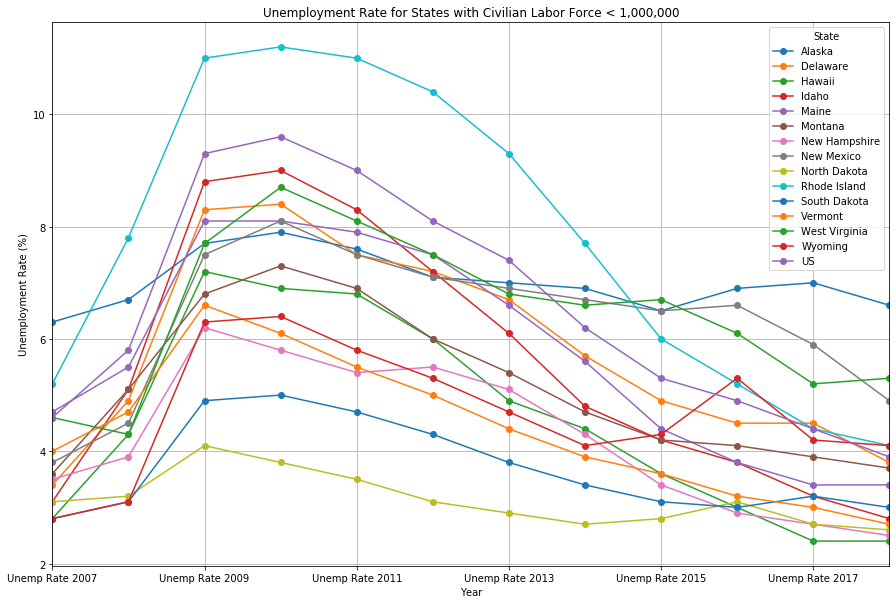

In [111]:
add_us =[unemp_by_size["<1,000,000"]['unemp_by_size'],us_unemployment]
results01 = pd.concat(add_us, axis=0)
results01.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force < 1,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
#plt.savefig(r'1m_CLF_unemp')

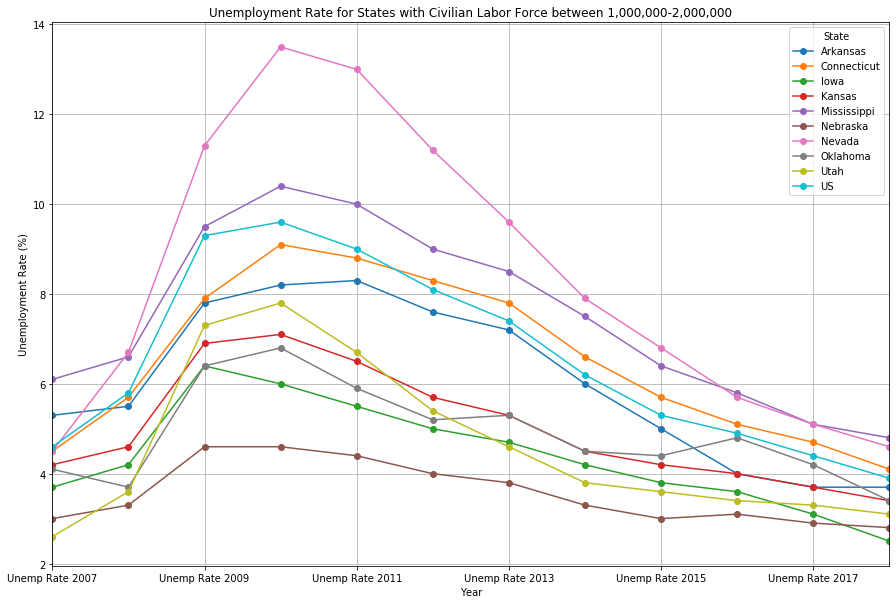

In [112]:
add_us1 =[unemp_by_size["1,000,000-2,000,000"]['unemp_by_size'],us_unemployment]
results02 = pd.concat(add_us1, axis=0)
results02.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

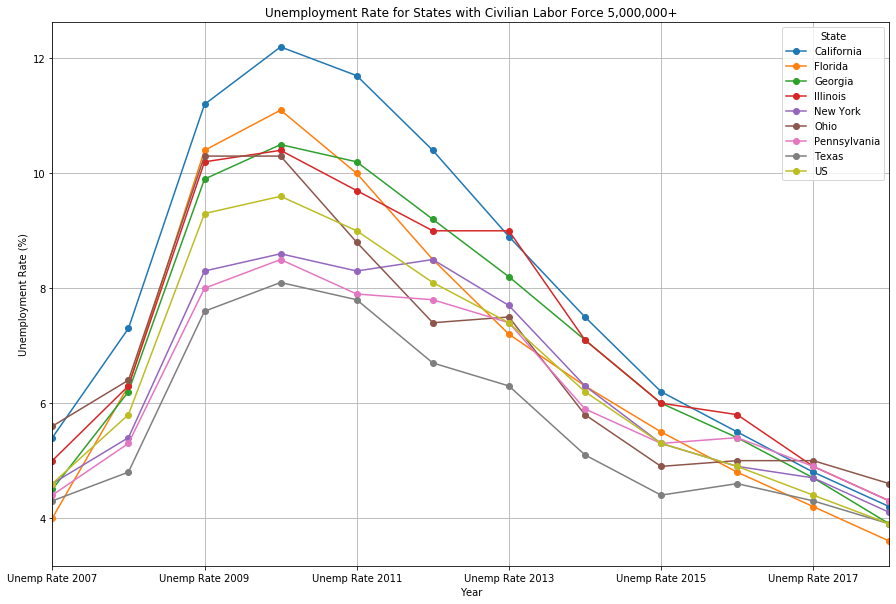

In [142]:
add_us5 =[unemp_by_size["5,000,000+"]['unemp_by_size'],us_unemployment]
results06 = pd.concat(add_us5, axis=0)
results06.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force 5,000,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel('Year')
plt.grid()
#plt.savefig(r'5m_CLF_unemp')

In [41]:
## binning states by size of CLF and comparing house price

In [113]:

house_price_by_size_of_state = {}
for y in group_names:
    house_price_by_size_of_state[y] = {
        'house_price_by_size': med_house_price_size(y)
    }
house_price_by_size_of_state['<1,000,000']['house_price_by_size'].head()

Median House Price 2007  Median House Price 2008  \
State                                                        
Alaska                     280610                   281670   
Delaware                   498950                   494750   
Hawaii                     540600                   530960   
Idaho                      338260                   340790   
Maine                      505590                   508000   

          Median House Price 2009  Median House Price 2010  \
State                                                        
Alaska                     281750                   275120   
Delaware                   473950                   441040   
Hawaii                     492570                   451520   
Idaho                      324370                   285030   
Maine                      489150                   459360   

          Median House Price 2011  Median House Price 2012  \
State                                                        
Alaska                     279650                   279760   
Delaware                   422480                   408400   
Hawaii                     442210                   446580   
Idaho                      258040                   255600   
Maine                      452110                   446270   

          Median House Price 2013  Median House Price 2014  \
State                                                        
Alaska                     287540                   290040   
Delaware                   406090                   409870   
Hawaii                     459280                   495560   
Idaho                      265000                   280770   
Maine                      446330                   445630   

          Median House Price 2015  Median House Price 2016  \
State                                                        
Alaska                     301500                   311100   
Delaware                   423630                   429290   
Hawaii                     530810                   566130   
Idaho                      295910                   316830   
Maine                      460680                   473990   

          Median House Price 2017  Median House Price 2018  
State                                                       
Alaska                     314950                   319680  
Delaware                   442070                   460310  
Hawaii                     591570                   621150  
Idaho                      340790                   380660  
Maine                      498550                   523320

In [43]:
## binning states by starting median house price in 2007

In [114]:
bins1 = [100000,250000,300000,400000,500000,800000]
group_names1 = ["100,000-250,000","250,000-300,000","300,000-400,000","400,000-500,000","500,000+"]
e_states["Starting House Price"] = pd.cut(e_states["Median House Price 2007"], bins1, labels=group_names1)


In [115]:
def start_house_price_group(price):
    pop=e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [116]:
grouped_house_price = {}
for i in group_names1:
    grouped_house_price[i] = {
        'gr_house_price': start_house_price_group(i)
    }

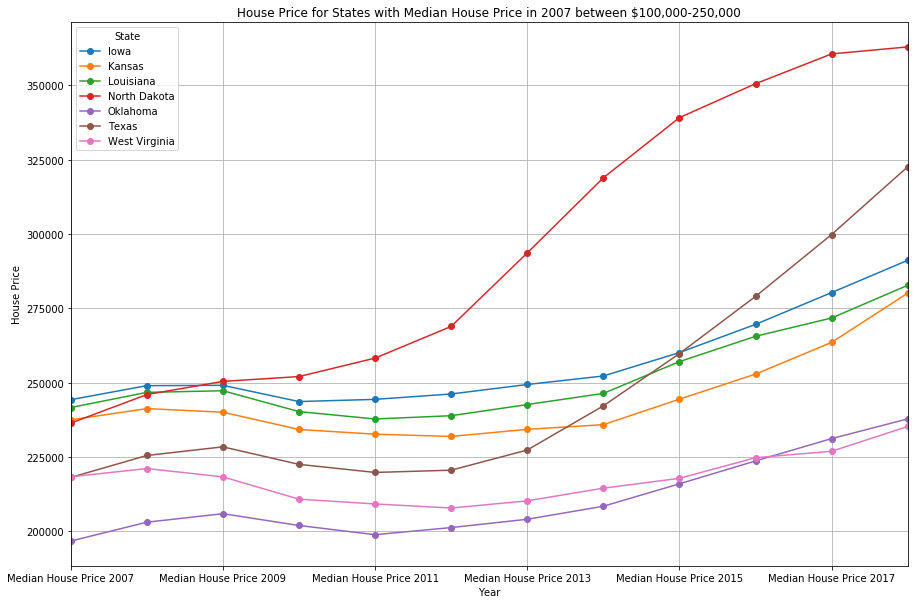

In [127]:
grouped_house_price["100,000-250,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $100,000-250,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()
#plt.savefig(r'Starting_House_Price_100-250')

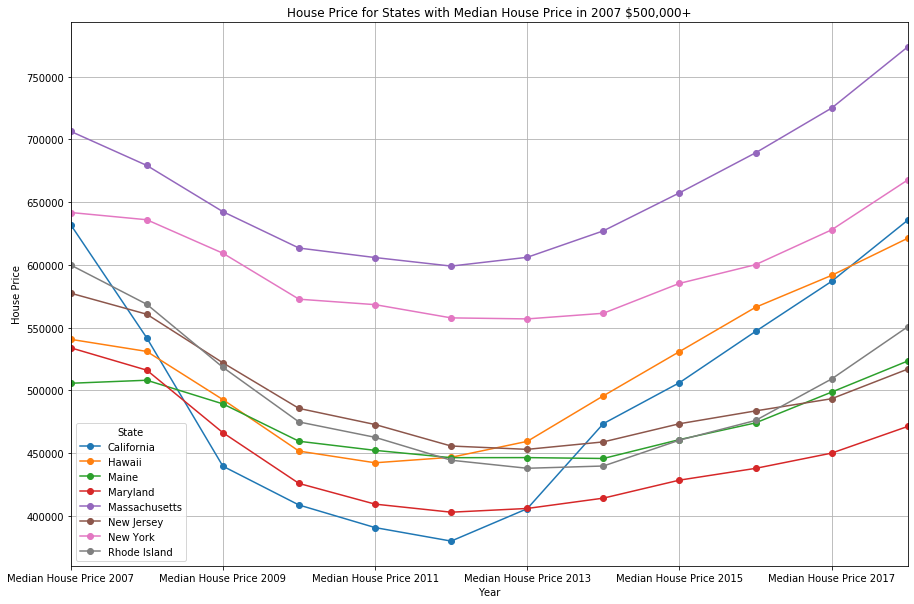

In [175]:
grouped_house_price["500,000+"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 $500,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()
#plt.savefig(r'Starting_House_Price_500+')

In [129]:
## binning states by price of home in 2007 then comparing the unemployment rate of those states

In [130]:
def unemployment_by_start_house_price(price):
    pop = e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [131]:
unemp_by_house_price = {}
for a in group_names1:
    unemp_by_house_price[a] = {
        'unemp_by_price': unemployment_by_start_house_price(a)
    }

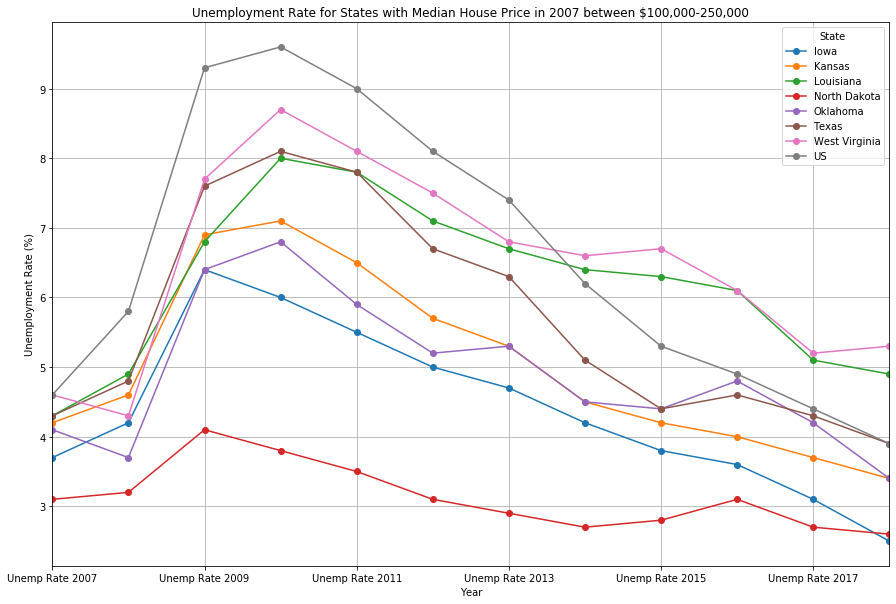

In [132]:
frame3 = [unemp_by_house_price['100,000-250,000']['unemp_by_price'],us_unemployment]
results4 = pd.concat(frame3, axis=0)
results4.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $100,000-250,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
#plt.savefig(r'unemp_house_price_1m_2m')

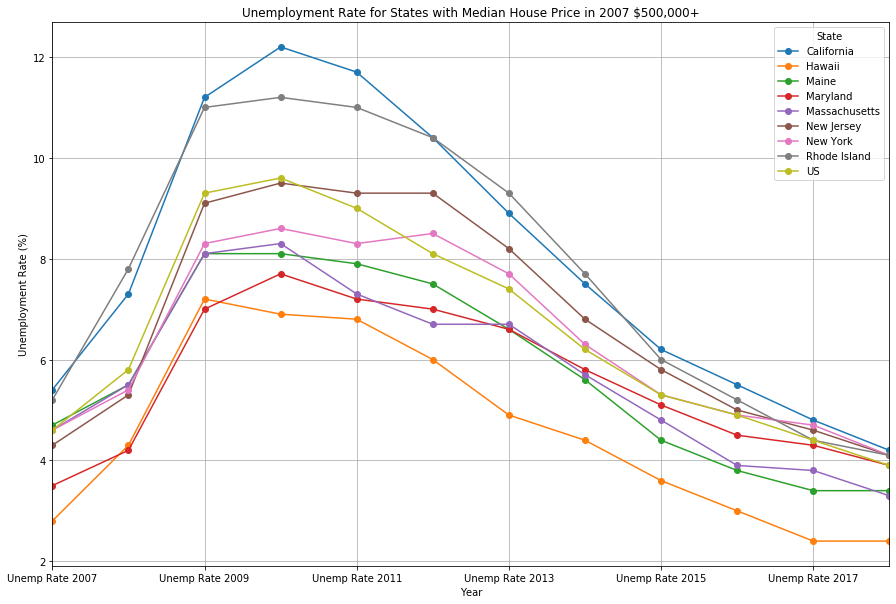

In [133]:
frame = [unemp_by_house_price['500,000+']['unemp_by_price'],us_unemployment]
results1 = pd.concat(frame, axis=0)
results1.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 $500,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
#plt.savefig(r'unemp_by_house_price_5m')

In [134]:
## identifying which states to loop through and create graphics 

In [135]:
new_states = ["Rhode Island", "California", "North Dakota"]

Text(0.5, 1.0, 'Unemployment Rate vs. House Price in California')

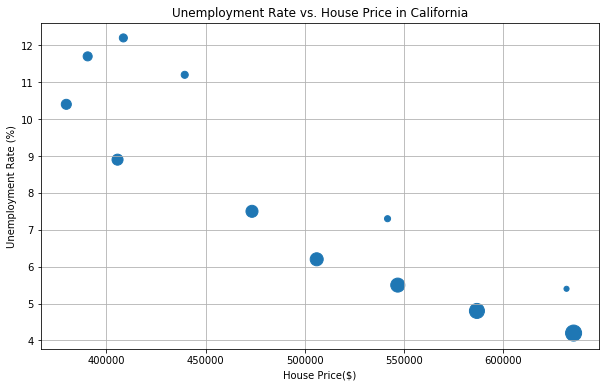

In [136]:

plt.figure(figsize=(10,6))
plt.scatter(states_house_price["California"]['house_price'],unemployment_data_by_state["California"]['unemployment_data'], s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in California")
#plt.savefig(r"unemp_house_price_cali")

Text(0.5, 1.0, 'Unemployment Rate vs. House Price in Rhode Island')

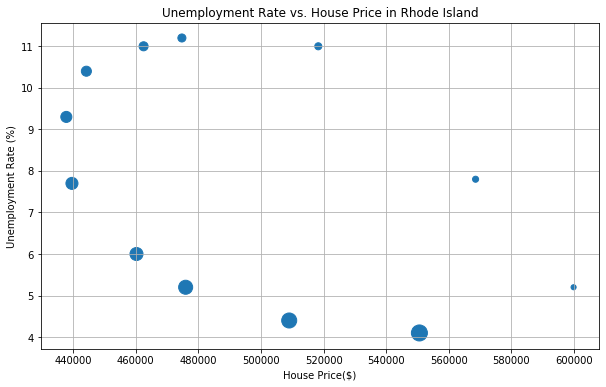

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price["Rhode Island"]['house_price'],unemployment_data_by_state["Rhode Island"]['unemployment_data'], s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in Rhode Island")
#plt.savefig(r"unemp_house_price_rhode_island")

Text(0.5, 1.0, 'Unemployment Rate vs. House Price in North Dakota')

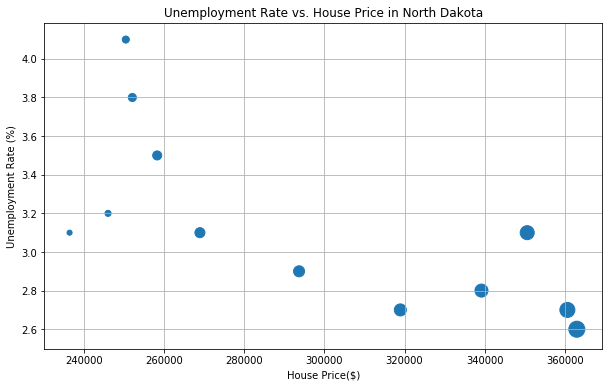

In [162]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price["North Dakota"]['house_price'],unemployment_data_by_state["North Dakota"]['unemployment_data'], s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in North Dakota")

Text(0.5, 1.0, 'Median House Price in the United States')

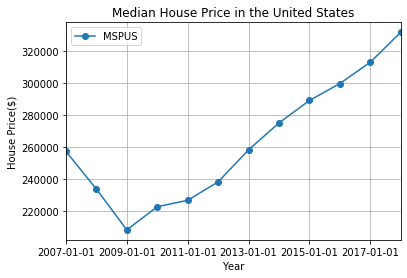

In [176]:
us_med_house_price.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()
plt.title(f"Median House Price in the United States")

Text(0.5, 1.0, 'Unemployment Rate vs. House Price in the United States')

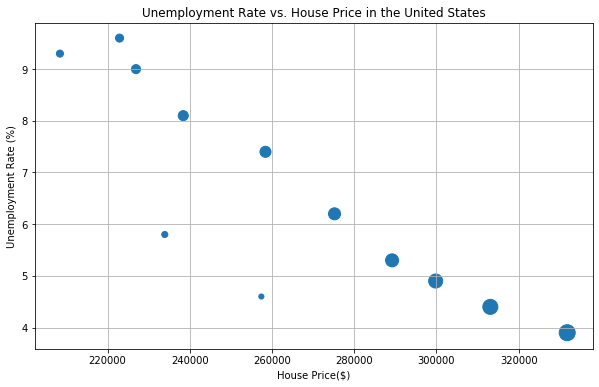

In [160]:
us_med_house_price = pd.read_csv('us_house_price_data')
del us_med_house_price["Unnamed: 0"]
us_med_house_price = us_med_house_price.set_index("DATE")
plt.figure(figsize=(10,6))
plt.scatter(us_med_house_price,us_unemployment,s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in the United States")

R-value: -0.35464364235618345


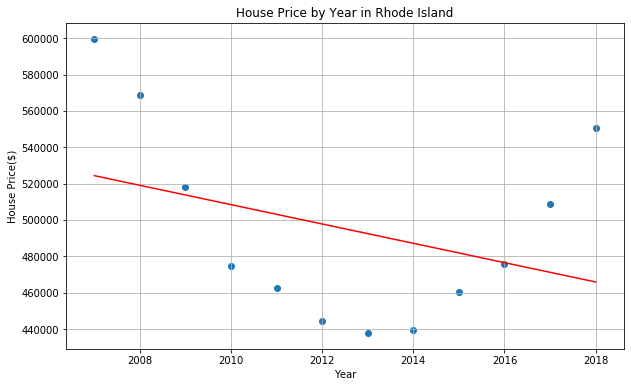

In [138]:

plt.figure(figsize=(10,6))
lineregress(years, states_house_price["Rhode Island"]['house_price'])
plt.scatter(years,states_house_price["Rhode Island"]['house_price'])
plt.title(f"House Price by Year in Rhode Island")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()
#plt.savefig(r'house_price_by_year_RI')

R-value: 0.2654784524714281


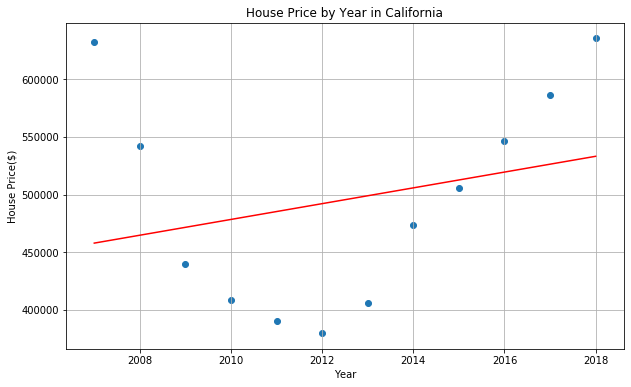

In [139]:
plt.figure(figsize=(10,6))
lineregress(years, states_house_price["California"]['house_price'])
plt.scatter(years,states_house_price["California"]['house_price'])
plt.title(f"House Price by Year in California")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()
#plt.savefig(r'house_price_by_year_cali')

R-value: -0.5519059978558892


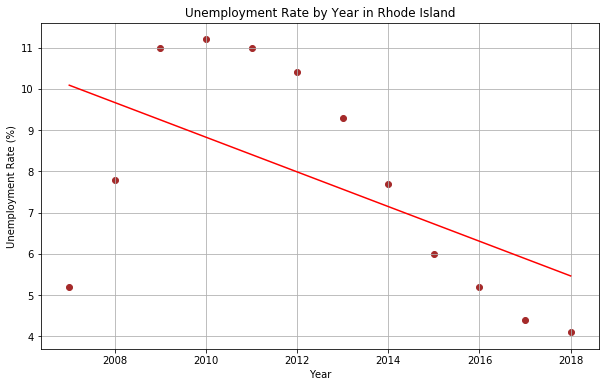

In [140]:
plt.figure(figsize=(10,6))
lineregress(years,unemployment_data_by_state["Rhode Island"]['unemployment_data'])
plt.scatter(years,unemployment_data_by_state["Rhode Island"]['unemployment_data'], c='brown')
plt.title(f"Unemployment Rate by Year in Rhode Island")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
#plt.savefig(r'unemp_by_year_RI')

R-value: -0.5282415264036183


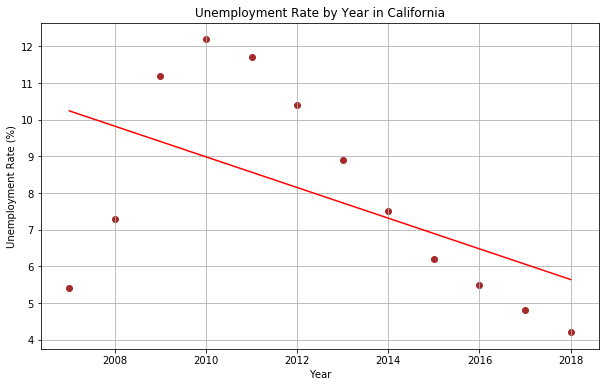

In [141]:
plt.figure(figsize=(10,6))
lineregress(years,unemployment_data_by_state["California"]['unemployment_data'])
plt.scatter(years,unemployment_data_by_state["California"]['unemployment_data'], c='brown')
plt.title(f"Unemployment Rate by Year in California")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
#plt.savefig(r'unemp_by_year_cali')